# Analyzing the complexity of algorithms

Algorithms can be analyzed for their complexity and as such grant an insight how the running time of the program depends on the size of the input `n`. Here I wrote a simple algorithm analysis program that can be used to test if you analyzed the complexity of the algorithm correctly. 

First we need a timer to measure the execution time of our function/algorithm. For that we use the `time()` function from the `time` module. We also need the data array `A[]` and the input lengths `n` and for that use numpy. For plotting the measurements we can use `matplotlib`.

In [56]:
import time
import numpy as np
import matplotlib.pyplot as plt
import math

The complexity of any function can be analyzed by measuring the time it takes to execute the function and then by making the input of the function bigger with every subsequent function call. This an be achived by the following `complexity` function, where `n` are all the different input sizes:

In [57]:
def analyzeComplexity(f: callable, n:list[float]):
    countN = len(n)
    ret = np.arange(countN, dtype=float)

    # Some pretty printing:
    print("Analyzing function complexity. Progress:")
    print("[", end='')
    for i in range(countN):
        print("-", end='')
    print("]")

    # Measure the time according to each input size n[i]
    print("[", end='')
    for i in range(countN):
        A = np.full([n[i]], 1)
        startTime = time.time()

        # Execute the function and measure the execution time
        f(A, n[i])

        endTime = time.time()
        ret[i] = endTime - startTime
        print("*", end='')
    print("]")

    return (n, ret)

Here we have a simple function to plot the result of the complexity analysis:

In [58]:
def plotComplexity(graph, f):
    x, y = graph
    plt.plot(x, y)
    plt.title("Complexity of " + str(f))
    plt.xlabel("n [count]")
    plt.ylabel("t [s]")
    plt.show()

Now we can define the functions that we want to analyze. In this case it is a random function from my homework:

In [59]:
def f1(A, n) -> int:
    if(n == 0):
        return 0
    s:int = 0
    for i in range(n):
        s = s + A[i]
    s = s + f1(A, math.floor(n/2))
    return s

def f2(A, n) -> int:
    a = n**3
    b = 1
    while a > 1:
        b = b + 1
        c = n
        i = 0
        while True:
            a = math.floor(b/2)
            c = 2*c/n
            b = b*n
            if c < n:
                break

Using all the above defined we can now analyze the compexities of pretty much any function or algorithm and compare them to what we think the complexities are:

n: [100000, 215443, 464158, 1000000, 2154434, 4641588, 10000000, 21544346, 46415888, 100000000]
Analyzing function complexity. Progress:
[----------]
[**********]


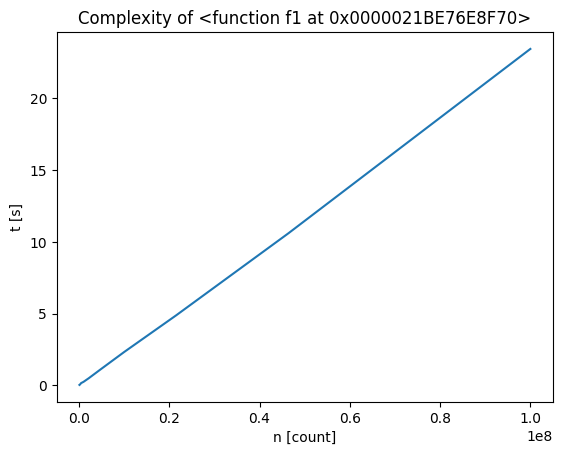

n: [100000, 215443, 464158, 1000000, 2154434, 4641588, 10000000, 21544346, 46415888, 100000000]
Analyzing function complexity. Progress:
[----------]
[**********]


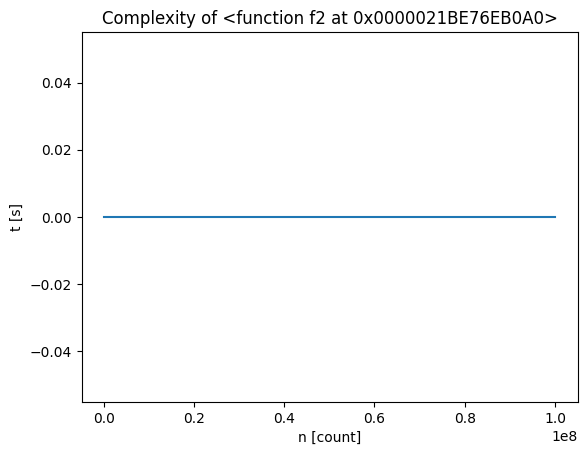

In [60]:
# Choose some input sizes n, best if they are in logarithmic scale to see
# how the function behaves with small and large input
n: list[float] = [math.floor(10 ** (i/3)) for i in range(15, 25)]
print("n: ", end='')
print(n)

# Finally plot a graph with the measurements
complF = analyzeComplexity(f1, n)
plotComplexity(complF, f1)

n: list[float] = [math.floor(10 ** (i/3)) for i in range(15, 25)]
print("n: ", end='')
print(n)

# Finally plot a graph with the measurements
complF = analyzeComplexity(f2, n)
plotComplexity(complF, f2)